# MFAQUAL - MFA for Qualitatives Variables - Plot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pyreadr
import pandas as pd
result = pyreadr.read_r('./data/poison.rda')
poison = result["poison"]
poison.head(6)

,Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
rownames,,,,,,,,,,,,,,,
1,9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
2,5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
3,6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
4,9,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_n,Courg_y,Cheese_y,Icecream_y
5,7,14,Sick_y,M,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
6,72,9,Sick_y,M,Nausea_n,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_n,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [3]:
group_name = ["desc","desc2","symptom","eat"]
group = [2,2,5,6]
group_type = ["s","n","n","n"]
num_group_sup = [0,1]

In [4]:
from scientisttools import MFAQUAL

res_mfaqual = MFAQUAL(group=group,name_group=group_name,group_type=group_type,var_weights_mfa=None,num_group_sup=[0,1],parallelize=True)
res_mfaqual.fit(poison)

MFAQUAL(group=[2, 2, 5, 6], group_type=['s', 'n', 'n', 'n'],
        name_group=['desc', 'desc2', 'symptom', 'eat'], num_group_sup=[0, 1],
        parallelize=True)

## Eigenvalues plots

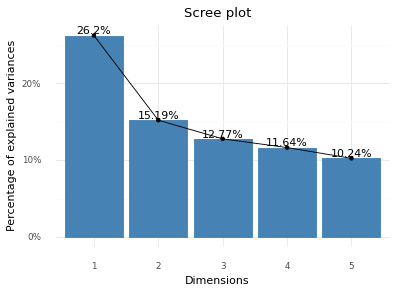

In [5]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mfaqual,add_labels=True)
print(p)

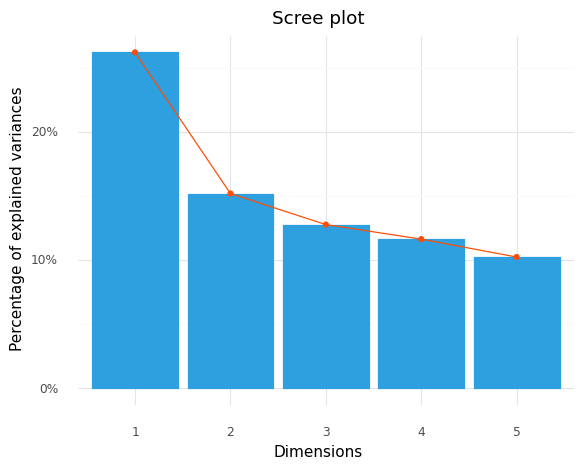

In [6]:
p = fviz_screeplot(res_mfaqual,line_color = "#FC4E07",bar_color = "#2E9FDF", bar_fill = "#2E9FDF")
print(p)

## Individuals Factor Map

### Color by RGB color

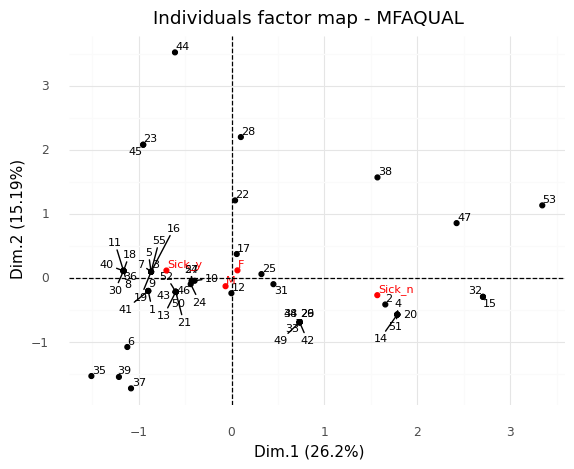

In [7]:
from scientisttools import fviz_mfa_ind
p = fviz_mfa_ind(res_mfaqual,repel=True)
print(p)

### Color by cos2

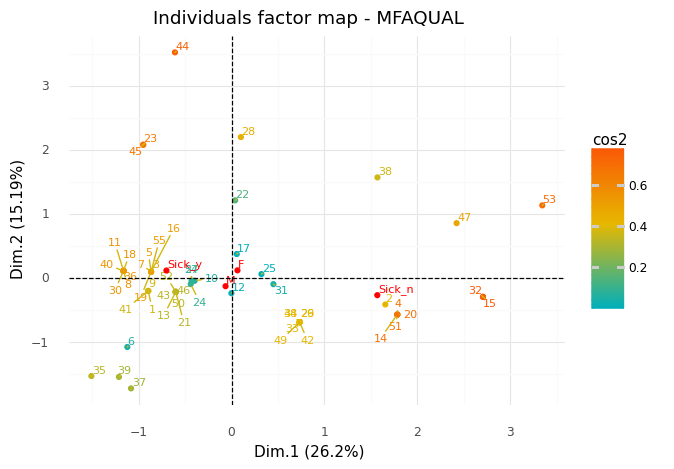

In [8]:
p = fviz_mfa_ind(res_mfaqual,color="cos2",repel=True)
print(p)

### Color by contrib

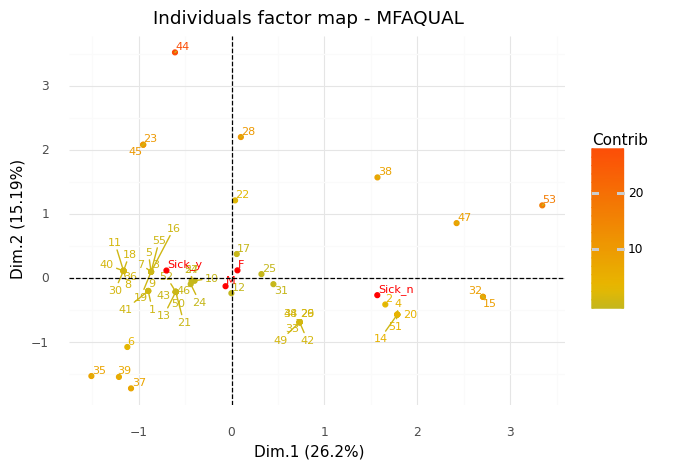

In [9]:
p = fviz_mfa_ind(res_mfaqual,color="contrib",repel=True)
print(p)

## Color by actives qualitatives variables

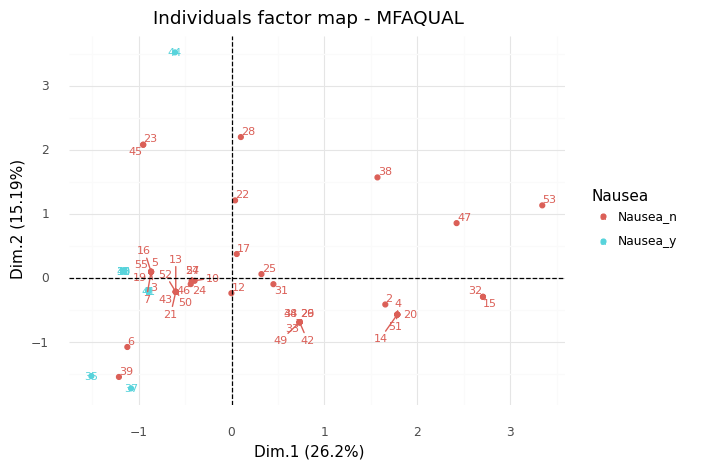

In [10]:
p = fviz_mfa_ind(res_mfaqual,habillage="Nausea",repel=True)
print(p)

### Color by supplementary qualitatives variables

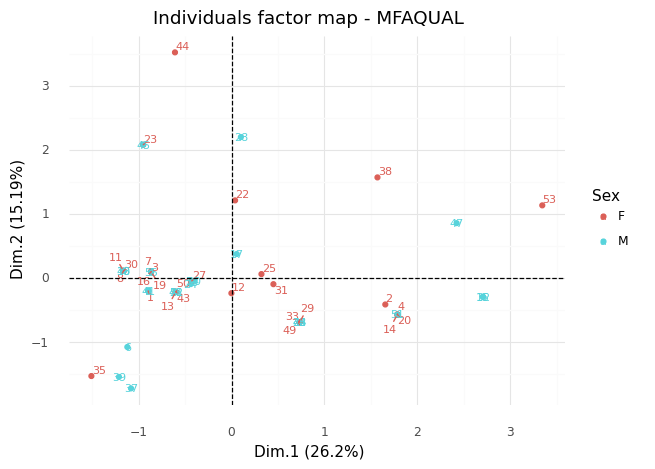

In [11]:
p = fviz_mfa_ind(res_mfaqual,habillage="Sex",repel=True)
print(p)

### Color by supplementary quantitatives variables

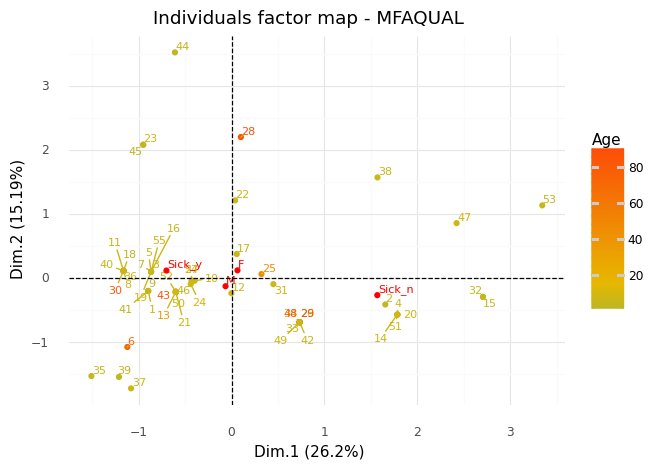

In [12]:
p = fviz_mfa_ind(res_mfaqual,color="Age",repel=True)
print(p)

### Color by numpy array

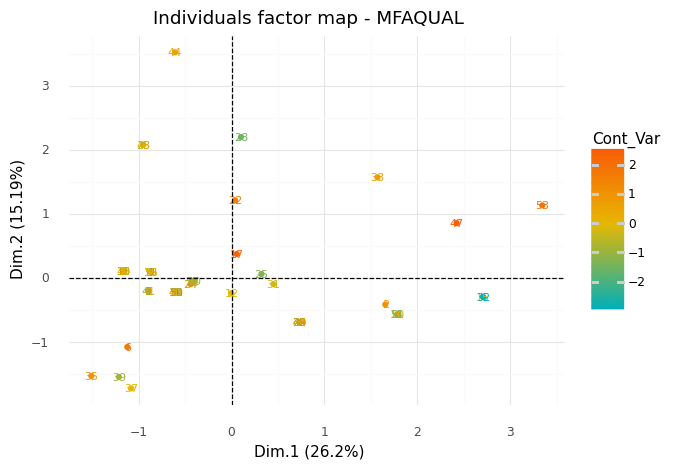

In [13]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfaqual.ind_["coord"].shape[0])
p = fviz_mfa_ind(res_mfaqual,color=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

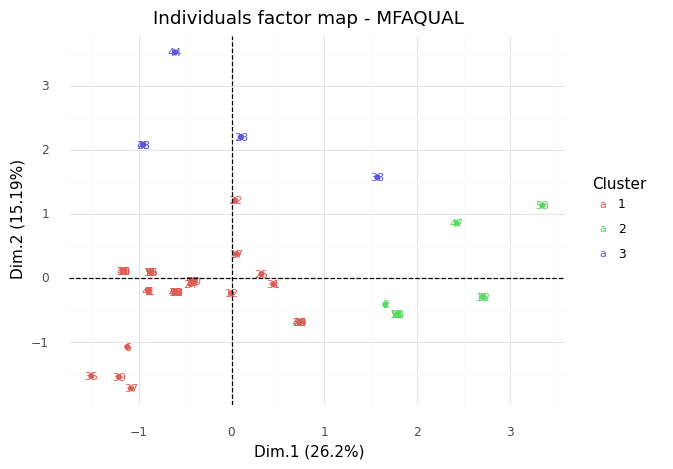

In [14]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfaqual.ind_["coord"])
p = fviz_mfa_ind(res_mfaqual,color=kmeans,repel=False,quali_sup=False)
print(p)

### Set limit

#### limit cos2

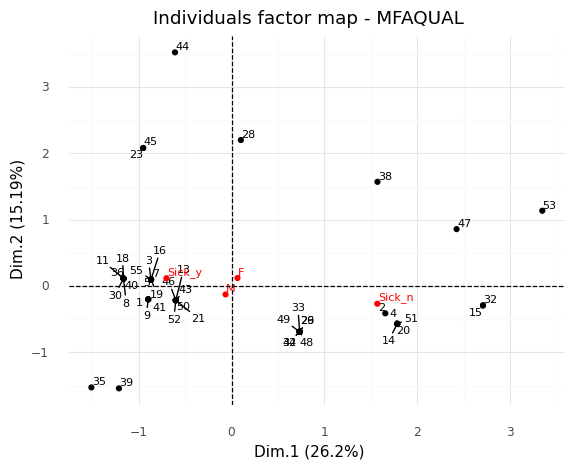

In [15]:
p = fviz_mfa_ind(res_mfaqual,lim_cos2=0.3,repel=True)
print(p)

#### limit contrib

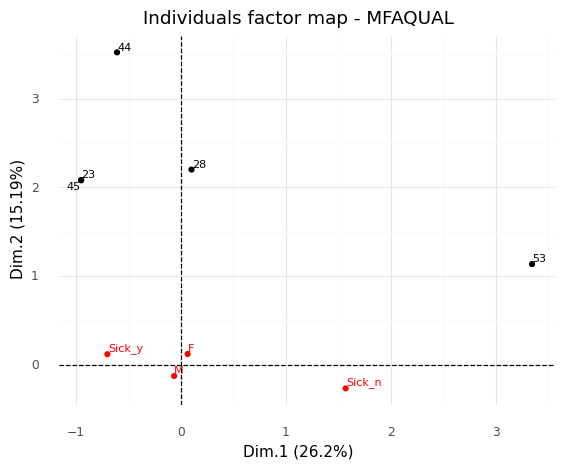

In [16]:
p = fviz_mfa_ind(res_mfaqual,lim_contrib=10,repel=True)
print(p)

## Qualitative variable categories Factor Map

### Color by RGB color

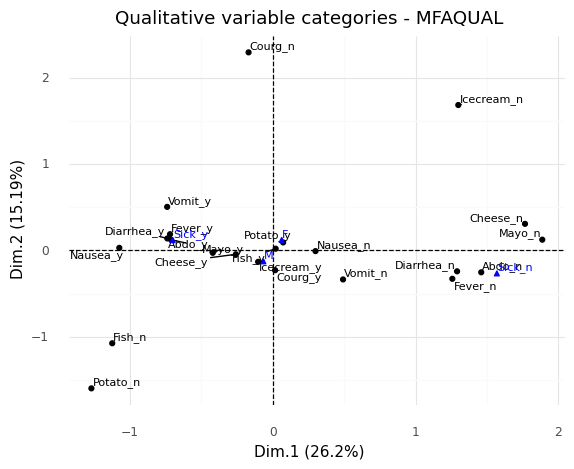

In [17]:
from scientisttools import fviz_mfaqual_var
p = fviz_mfaqual_var(res_mfaqual,repel=True)
print(p)    

### Color by cos2

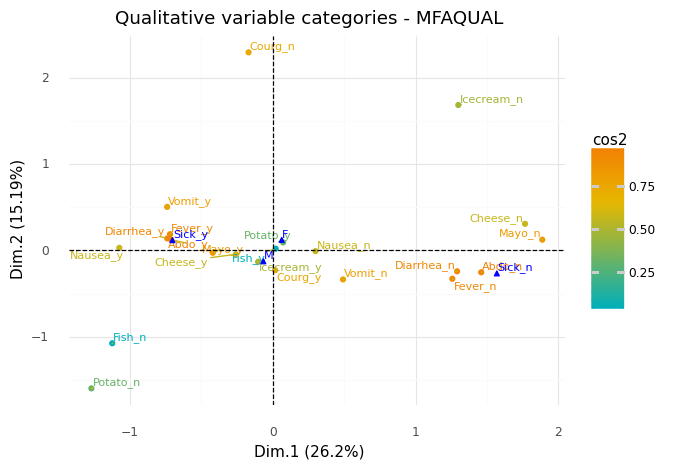

In [18]:
p = fviz_mfaqual_var(res_mfaqual,color="cos2",repel=True)
print(p) 

### Color by contrib

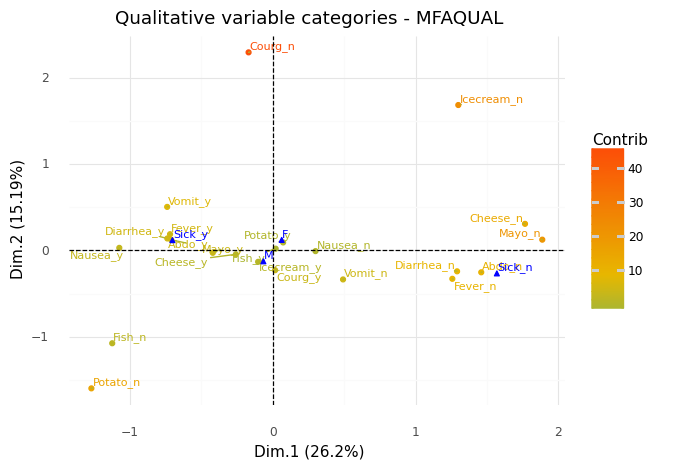

In [19]:
p = fviz_mfaqual_var(res_mfaqual,color="contrib",repel=True)
print(p)

### Color by numpy array

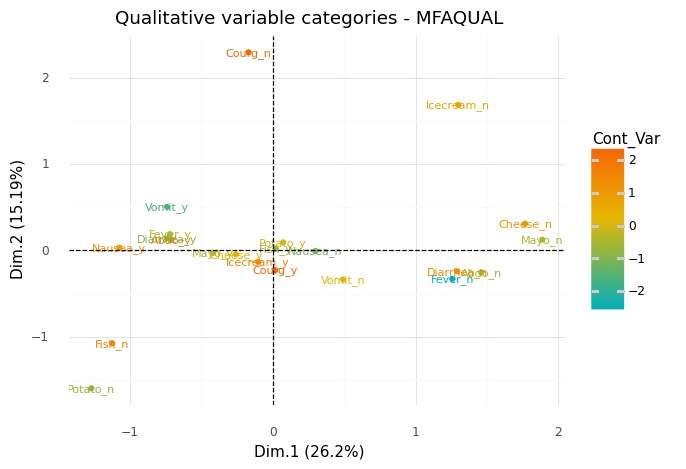

In [20]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfaqual.quali_var_["coord"].shape[0])
p = fviz_mfaqual_var(res_mfaqual,color=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

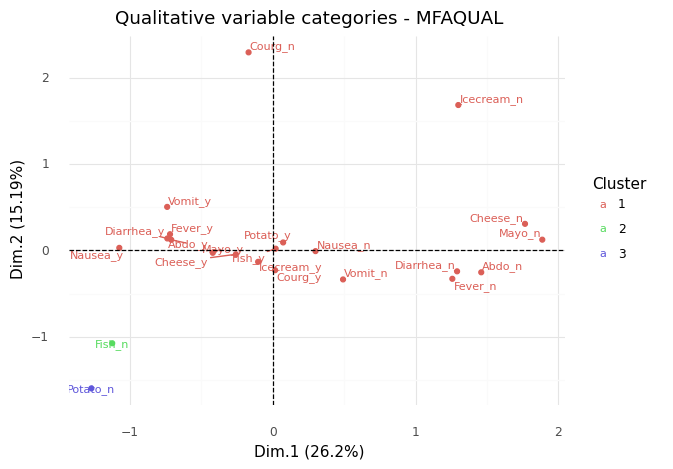

In [21]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfaqual.quali_var_["coord"])
p = fviz_mfaqual_var(res_mfaqual,color=kmeans,repel=True,quali_sup=False)
print(p)

### Set limit

#### limit cos2

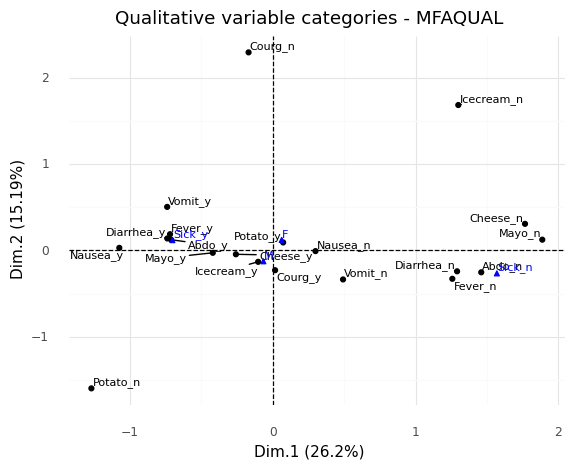

In [22]:
p = fviz_mfaqual_var(res_mfaqual,lim_cos2=0.3,repel=True)
print(p)

#### limit contrib

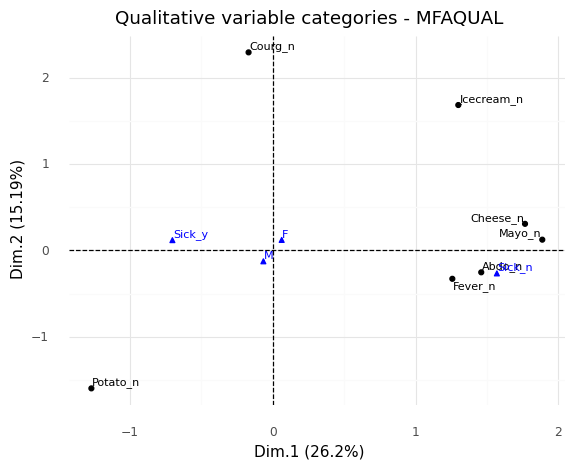

In [23]:
p = fviz_mfaqual_var(res_mfaqual,lim_contrib=10,repel=True)
print(p)

## Variables groups

### Color by RGB

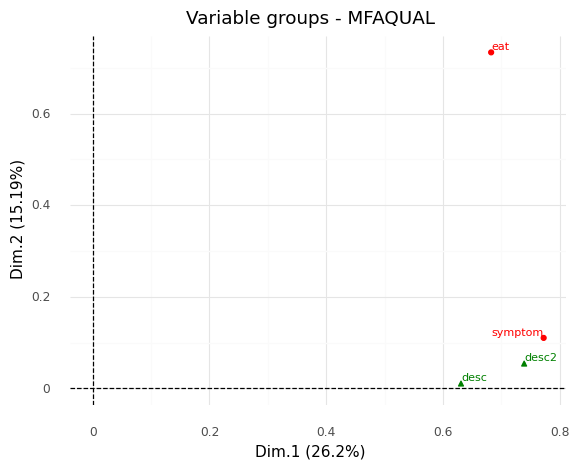

In [24]:
from scientisttools import fviz_mfa_group
p = fviz_mfa_group(res_mfaqual,repel=True)
print(p)

### Color by cos2

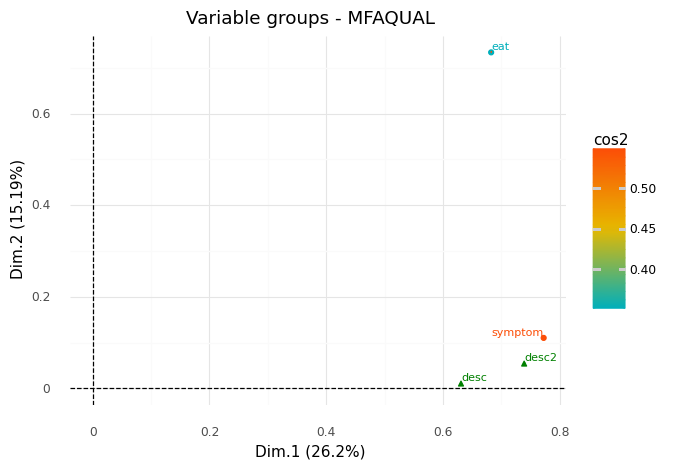

In [25]:
p = fviz_mfa_group(res_mfaqual,color="cos2",repel=True)
print(p)

### Color by contrib

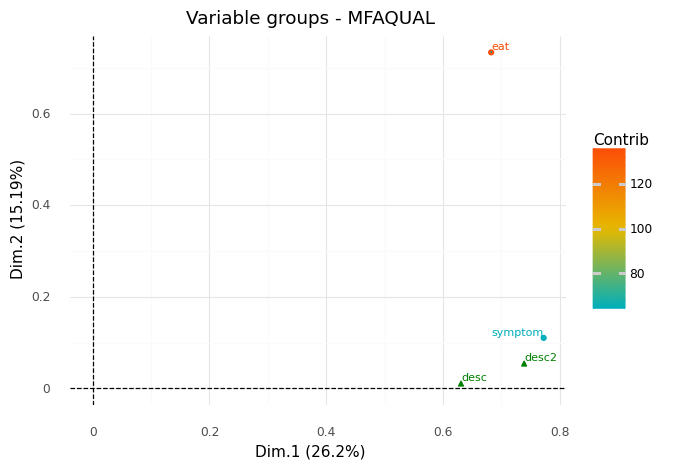

In [26]:
p = fviz_mfa_group(res_mfaqual,color="contrib",repel=True)
print(p)

### Color by numpy array

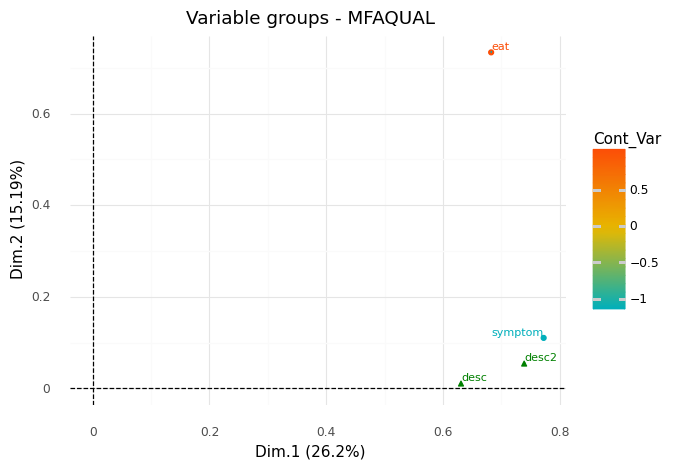

In [27]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfaqual.group_["coord"].shape[0])
p = fviz_mfa_group(res_mfaqual,color=color_numpy,repel=True)
print(p)

### Color by kmeans

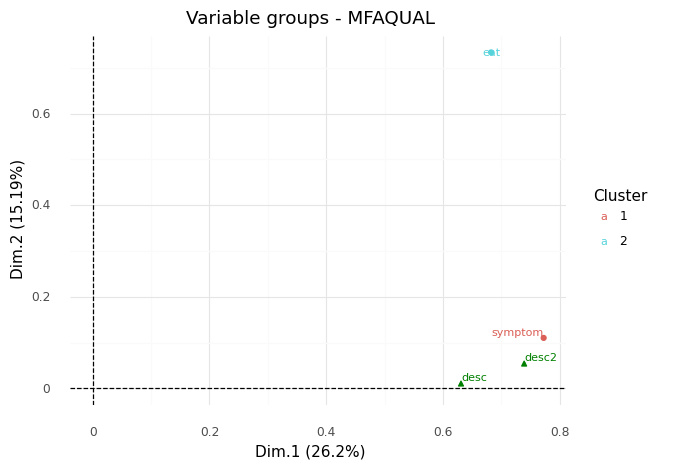

In [28]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_mfaqual.group_["coord"])
p = fviz_mfa_group(res_mfaqual,color=kmeans,repel=True)
print(p)

## Partial axes

### Color by RGB color

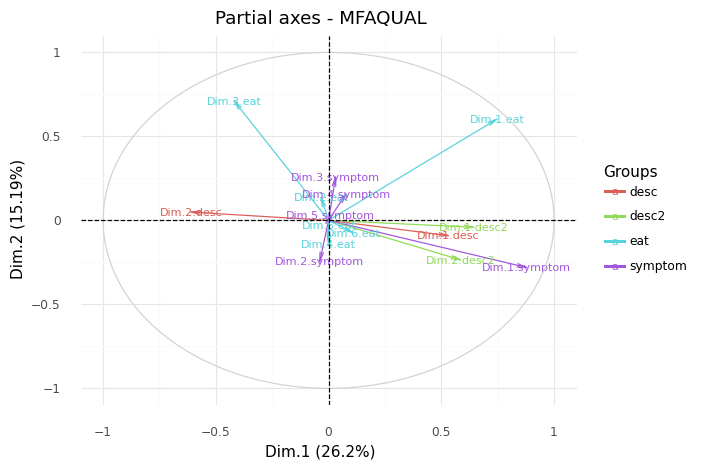

In [29]:
from scientisttools import fviz_mfa_axes
p = fviz_mfa_axes(res_mfaqual,color="black")
print(p)

### Color by group

In [ ]:
p = fviz_mfa_axes(res_mfaqual)
print(p)